In [13]:
import numpy as np
import pandas as pd
import os

In [14]:
import h2o
import pandas as pd
from h2o.automl import H2OAutoML

In [15]:
import h2o
h2o.init();

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 mins 49 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.6
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_antonio_xz2m32
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,846 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [18]:
train = h2o.import_file('./train.csv')
test = h2o.import_file('./predict.csv')
sub_data = h2o.import_file('./sample_submission.csv')

H2OResponseError: Server error water.exceptions.H2ONotFoundArgumentException:
  Error: File /home/antonio/Documentos/bootcamp/Proyecto_5/outputs/train.csv does not exist
  Request: POST /3/ImportFilesMulti
    data: {'paths': '[/home/antonio/Documentos/bootcamp/Proyecto_5/outputs/train.csv]'}


In [17]:
y = "price"
x = train.columns
x.remove(y)

NameError: name 'train' is not defined

In [1]:
run_automl_for_seconds = 18000
#weight_col = "carat"
balance_classes= True # Este se supone que busca las variables que son más relevantes
aml = H2OAutoML(max_runtime_secs = run_automl_for_seconds, 
                balance_classes = True,
                sort_metric = "RMSE"
                include_algos = ["GLM"] 
               )

SyntaxError: invalid syntax (<ipython-input-1-c2da3bab2a27>, line 7)

In [2]:
train_final, valid2 = train.split_frame(ratios=[0.8])

NameError: name 'train' is not defined

In [8]:
aml.train(x=x, y =y, training_frame=train_final, validation_frame=valid2)

AutoML progress: |
00:04:19.258: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████
01:04:17.522: GBM_grid__1_AutoML_20200721_000419 [GBM Grid Search] failed: java.lang.AssertionError

| 100%


In [11]:
leader_model2 = aml.leader
pred2 = leader_model2.predict(test_data=test)
pred2

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
15945.7
15975.1
1047.18
440.749
3782.94
1941.54
788.465
5001.74
754.045
4241.9


In [12]:
pred_pd2 = pred2.as_data_frame() 
sub2 = sub_data.as_data_frame() 
sub2

,id,price
0,0,9036
1,1,3171
2,2,14486
3,3,13267
4,4,13922
...,...,...
13480,13480,12275
13481,13481,463
13482,13482,5025
13483,13483,5266


In [13]:
perf2 = aml.leader.model_performance(valid2)
perf2


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 281443.28112484125
RMSE: 530.5122817851075
MAE: 275.73892584168584
RMSLE: 0.10101297032833796
Mean Residual Deviance: 281443.28112484125


In [14]:
sub2['price'] = pred_pd2
h2o_test2 = pd.DataFrame(sub2.price)
h2o_test2.index.name = "id"

In [15]:
display(h2o_test2)

,price
id,
0,15945.677517
1,15975.146515
2,1047.181303
3,440.748520
4,3782.939275
...,...
13480,2532.087788
13481,4956.338149
13482,2421.778393


In [16]:
h2o_test2.to_csv('resultGLMDRFGBM.csv')

In [17]:
import matplotlib.pyplot as plt
for c in enumerate(h2o_test2.iterrows(),1):
        c

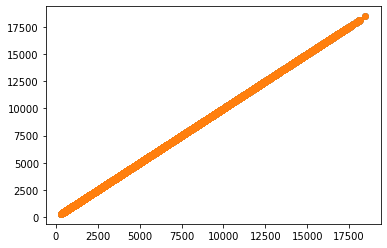

In [18]:
plt.scatter(h2o_test2,h2o_test2)
plt.scatter(pred_pd2,pred_pd2)